In [100]:
from rossby_waves import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def rossby_velocity(r, eps=0.1, irrotational=False, solenoidal=False):
    def f(x, t):
        return r.velocity(x[0], x[1], t, eps, irrotational, solenoidal)
    return f


def trajectory(r, x0, t0, t, n, eps=0.1, irrotational=False,
               solenoidal=False, xrange = np.pi, yrange = np.pi):
    f = rossby_velocity(r, eps, irrotational, solenoidal)
    h = t/n
    x = x0
    t = t0
    i = 0
    trajectory = [x]
    while i < n:
        k_1 = f(x, t)
        k_2 = f(x + h*k_1/2, t + h/2)
        k_3 = f(x + h*k_2/2, t + h/2)
        k_4 = f(x + h*k_3, t + h)
        x = x + h/6*(k_1 + 2*k_2 + 2*k_3 + k_4)
        i += 1
        t += h
        x[0] += xrange
        x[0] = (x[0] % (2*xrange)) - xrange
        x[1] += yrange
        x[1] = (x[1] % (2*yrange)) - yrange
        trajectory.append(x)
    x_coords = [x[0] for x in trajectory]
    y_coords = [x[1] for x in trajectory]
    return x_coords, y_coords

In [50]:
k = 1
l = 1
r = RossbyWave(np.array([k, l]))

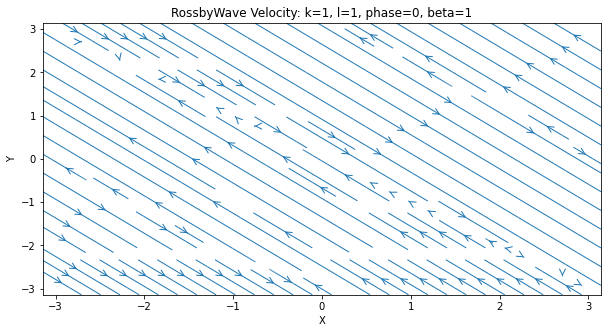

In [51]:
RossbyWave.plot_velocity(r, (-np.pi, np.pi, 20), (-np.pi, np.pi, 20))

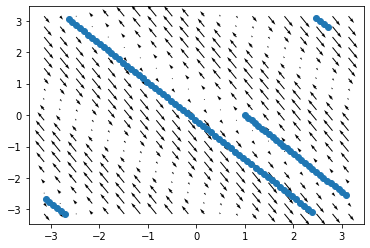

In [87]:
T = 5
x_, y_ = trajectory(r, np.array([1,0]), 0, T, 100)
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = r.velocity(X,Y,T)
fig, ax = plt.subplots()
ax.quiver(X, Y, u, v)
plt.plot(x_, y_, 'o')

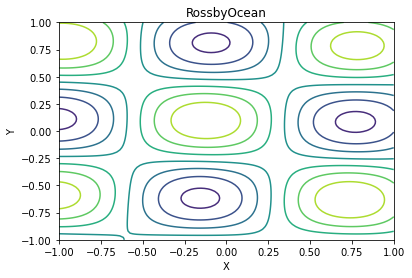

In [105]:
ro = RossbyOcean([r])
ro.add_random_waves(2)
ro.plot_streamfunction()


In [98]:
waves = [RossbyWave([10, 0]), RossbyWave([0, 10]), RossbyWave([7, 7])]
oross = RossbyOcean(waves)
oross.animate_velocity()

AttributeError: 'RossbyOcean' object has no attribute 'animate_velocity'

In [90]:
x_1, y_1 = trajectory(ro, np.array([0.5,0]), 0, 1, 80)
x_2, y_2 = trajectory(ro, np.array([0.5,0]), 0, 1, 1000)

T = 1
x = np.linspace(-np.pi, np.pi, 20)
y = np.linspace(-np.pi, np.pi, 20)
X, Y = np.meshgrid(x, y)
u, v = ro.velocity(X,Y,T)
fig, ax = plt.subplots()
ax.quiver(X, Y, u, v)
plt.plot(x_1, y_1, 'o')
plt.plot(x_2, y_2, 'ro')

ValueError: operands could not be broadcast together with shapes (2,) (2,20,20) 